<a href="https://colab.research.google.com/github/i4ata/NN_TBP/blob/main/data_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data generator

In [39]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

The discrete time step, masses of bodies, and gravitational constant are fixed for all data points

In [48]:
step = 0.001
max_t = 5
M = [1,1,1]
G = 1

This function calculates the acceleration of each of the three bodies in the current time step

In [49]:
def compute_acceleration(x,y,M,ax,ay,G):
    for j in range(3):

        dx = np.array(x[j] - x).transpose()
        dy = np.array(y[j] - y).transpose()

        d = np.power(np.sqrt( np.power(dx,2) + np.power(dy,2)),3)
        
        for k in range(3):
            if d[k] == 0:
                ax[k,j] = 0
                ay[k,j] = 0
            else:
                ax[k,j] = -dx[k]*M[k]*G / d[k]
                ay[k,j] = -dy[k]*M[k]*G / d[k]

        ax_tot = np.sum(ax, axis=0)
        ay_tot = np.sum(ay, axis=0)

    return ax_tot, ay_tot

This function employs the is used to calculate the trajectories of the three bodies for the whole duration of the simulation

In [50]:
def verlet_method(max_t = 5, step = 0.001, M = [1,1,1], G = 1, x1 = 0, y1 = 0, vx1 = 0, vy1 = 0, x2 = 0, y2 = 0, vx2 = 0, vy2 = 0, x3 = 0, y3 = 0, vx3 = 0, vy3 = 0):
    t = np.arange(0,max_t,step)
    
    x = np.array([[0 for x in range(3)] for y in range(len(t))], dtype='f')
    y = np.array([[0 for x in range(3)] for y in range(len(t))], dtype='f')

    vx = np.array([[0 for x in range(3)] for y in range(len(t))], dtype='f')
    vy = np.array([[0 for x in range(3)] for y in range(len(t))], dtype='f')

    ax = np.array([[0 for x in range(3)] for y in range(3)], dtype='f')
    ay = np.array([[0 for x in range(3)] for y in range(3)], dtype='f')

    x[0][0] = x1
    x[0][1] = x2
    x[0][2] = x3 

    y[0][0] = y1
    y[0][1] = y2
    y[0][2] = y3

    vx[0][0] = vx1
    vx[0][1] = vx2
    vx[0][2] = vx3 

    vy[0][0] = vy1
    vy[0][1] = vy2
    vy[0][2] = vy3 

    for i in range(len(t)-1):
        ax_tot, ay_tot = compute_acceleration(x[i], y[i], M, ax, ay, G)

        x[i+1] = x[i] + step*vx[i] + (ax_tot * step * step)/2
        y[i+1] = y[i] + step*vy[i] + (ay_tot * step * step)/2

        ax_tot_next, ay_tot_next = compute_acceleration(x[i+1], y[i+1], M, ax, ay, G)

        vx[i+1] = vx[i] + step * (ax_tot + ax_tot_next) / 2
        vy[i+1] = vy[i] + step * (ay_tot + ay_tot_next) / 2

    return x, y

This function nicely plots the resulting trajectories

In [7]:
def plot(x,y):
    Body1, = plt.plot(x[:,0], y[:,0], color = 'green')
    Body2, = plt.plot(x[:,1], y[:,1], color = 'blue')
    Body3, = plt.plot(x[:,2], y[:,2], color = 'red')
    plt.scatter(x[0][0], y[0][0], color = 'green')
    plt.scatter(x[0][1], y[0][1], color = 'blue')
    plt.scatter(x[0][2], y[0][2], color = 'red')
    plt.grid()
    plt.xlim(np.amin(x) - 0.2, np.amax(x) + 0.2)
    plt.ylim(np.amin(y) - 0.2, np.amax(y) + 0.2)

    plt.title("2D TBP for " + str(len(x)) + " time steps using verlet method")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend([Body1, Body2, Body3],['Body 1','Body 2','Body 3'])
    plt.show()

These functions are used to define the starting positions and velocities of the bodies. The velocities are random 2D vectors with numbers between -0.5 and 0.5. The positions are visualized in the next cell

In [38]:
def get_random_position(sector):
    theta = np.random.uniform(2*sector*math.pi/3,2*(sector+1)*math.pi/3)
    r = np.random.uniform(1.5,2)
    return math.cos(theta)*r, math.sin(theta)*r

def get_random_velocities():
    return_array = []
    for i in range(6):
        return_array.append(np.random.uniform(-0.5,0.5))
    return return_array
    

This is a visualization of the distribution of the starting positions of the three bodies. Every body's starting location is in its own colored region of the plot shown below

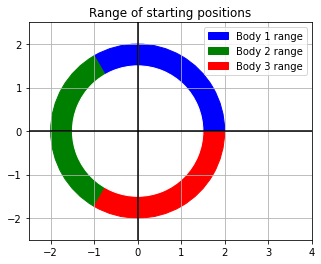

In [44]:
fig, ax = plt.subplots(1) 

ax.grid(True)
plt.axhline(linewidth=1.5, color='black')
plt.axvline(linewidth=1.5, color='black')

ax.add_artist(mpatches.Wedge((0,0), 2, 0, 120, fc='blue', edgecolor='blue'))
ax.add_artist(mpatches.Wedge((0,0), 2, 120, 240, fc='green', edgecolor='green'))
ax.add_artist(mpatches.Wedge((0,0), 2, 240, 360, fc='red', edgecolor='red'))
ax.add_artist(mpatches.Wedge((0,0), 1.5, 0, 360, fc='white', edgecolor = 'white'))

ax.set_xlim(-2.5, 4)
ax.set_ylim(-2.5, 2.5)
ax.set_aspect(1)

plt.title('Range of starting positions') 
red_patch = mpatches.Patch(color='red', label='Body 1 range')
ax.legend(handles=[mpatches.Patch(color='blue', label='Body 1 range'), mpatches.Patch(color='green', label='Body 2 range'), mpatches.Patch(color='red', label='Body 3 range')])

plt.show() 

This cell calculates the energy of the system

In [10]:
def get_kinetic_energy(mass, v1, v2):
    velocity = np.sqrt(v1*v1 + v2*v2)
    return mass*velocity*velocity/2

def get_potential_energy(x1, y1, m1, x2, y2, m2, G):
    distance = np.sqrt((y2-y1)*(y2-y1) + (x2-x1)*(x2-x1))
    return G*m1*m2/distance

def get_energy(x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3, M, G):
    total_kinetic =  get_kinetic_energy(M[0],vx1,vy1) + get_kinetic_energy(M[1],vx2,vy2) + get_kinetic_energy(M[2],vx3,vy3)
    total_potential = get_potential_energy(x1,y1,M[0],x2,y2,M[1],G) + get_potential_energy(x1,y1,M[0],x3,y3,M[2],G) + get_potential_energy(x2,y2,M[1],x3,y3,M[2],G)
    return total_kinetic - total_potential


This initializes the positions and velocities

In [36]:
x1,y1 = get_random_position(0)
x2,y2 = get_random_position(1)
x3,y3 = get_random_position(2)

vx1, vy1, vx2, vy2, vx3, vy3 = get_random_velocities()

This cell runs the verlet method

In [46]:
x,y = verlet_method(max_t, step, M, G, x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3)

This cell plots the results


Positions:
Body 1: 0.6556338306254643, 1.826925835865381
Body 2: -1.5434279230670591, -0.22053561288489745
Body 3: 1.6357691895908493, -0.004975706556942333

Velocities:
Body 1: 0.06922768175807359, 0.08626364458484459
Body 2: 0.10361012516058998, -0.19974421849364954
Body 3: -0.4184872182918724, -0.39891425300918515

Total energy of the system: -0.9293940729540883


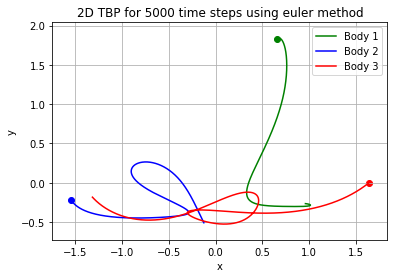

In [47]:
print("\nPositions:")
print("Body 1: " + str(x1) + ", " + str(y1))
print("Body 2: " + str(x2) + ", " + str(y2))
print("Body 3: " + str(x3) + ", " + str(y3) + "\n")

print("Velocities:")
print("Body 1: " + str(vx1) + ", " + str(vy1))
print("Body 2: " + str(vx2) + ", " + str(vy2))
print("Body 3: " + str(vx3) + ", " + str(vy3) + "\n")

print("Total energy of the system: " + str(get_energy(x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3, M, G)))
plot(x,y)